# Dataset: Letter Recognition Dataset (UCI)
	•	Task: Classify 26 capital letters (A–Z) based on 16 numerical features.
	•	Labels: Multiclass — 26 categories (A to Z).
	•	Model: Fully-connected DNN using Keras.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar',
           'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege',
           'xegvy', 'y-ege', 'yegvx']

df = pd.read_csv(url, header=None, names=columns)

In [4]:
print("First 5 rows:")
df.head()


First 5 rows:


,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 letter    0
x-box     0
y-box     0
width     0
height    0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64


In [6]:
print("\nData info:")
print(df.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


### Label Encoding: Convert letters A–Z to integers


In [7]:
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])  # A=0, B=1, ..., Z=25

In [9]:
df.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


### Split features and target

In [10]:
X = df.drop('letter', axis=1)
y = df['letter']

### Train-test split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Normalize the features

In [12]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

### One-hot encode the labels

In [13]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=26)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=26)

 ### Build the model

In [14]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(16,)),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  # 26 output classes
])

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Train the model

In [16]:
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.2151 - loss: 2.8698 - val_accuracy: 0.5669 - val_loss: 1.6416
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6000 - loss: 1.5123 - val_accuracy: 0.6488 - val_loss: 1.2882
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.6650 - loss: 1.2387 - val_accuracy: 0.6831 - val_loss: 1.1298
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6943 - loss: 1.1105 - val_accuracy: 0.7244 - val_loss: 1.0299
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.7325 - loss: 0.9864 - val_accuracy: 0.7344 - val_loss: 0.9891
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7411 - loss: 0.9465 - val_accuracy: 0.7594 - val_loss: 0.9145
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7592 - loss: 0.8846 - val_accuracy: 0.7669 - val_loss: 0.8705
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.7618 - loss: 0.8468 - 

In [17]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.8319 - loss: 0.5441

Test Accuracy: 83.13%


In [18]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step

Classification Report:
              precision    recall  f1-score   support

           A       0.81      0.94      0.87       149
           B       0.81      0.81      0.81       153
           C       0.81      0.80      0.81       137
           D       0.94      0.73      0.82       156
           E       0.84      0.77      0.80       141
           F       0.83      0.80      0.81       140
           G       0.77      0.69      0.73       160
           H       0.74      0.60      0.66       144
           I       0.86      0.85      0.86       146
           J       0.89      0.85      0.87       149
           K       0.71      0.85      0.77       130
           L       0.92      0.85      0.88       155
           M       0.91      0.92      0.91       168
           N       0.93      0.79      0.86       151
           O       0.85      0.72      0.78       145
           P       0.99      0.80      0.88       173
           Q  

### Confusion Matrix

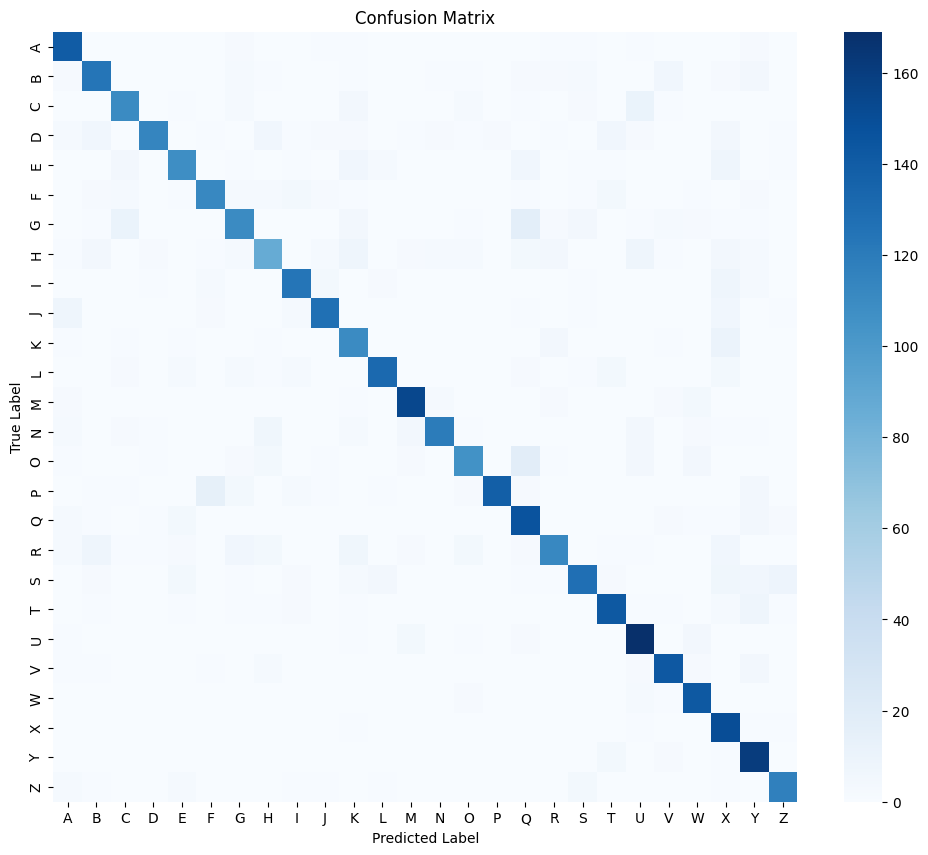

In [20]:
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Accuracy plot

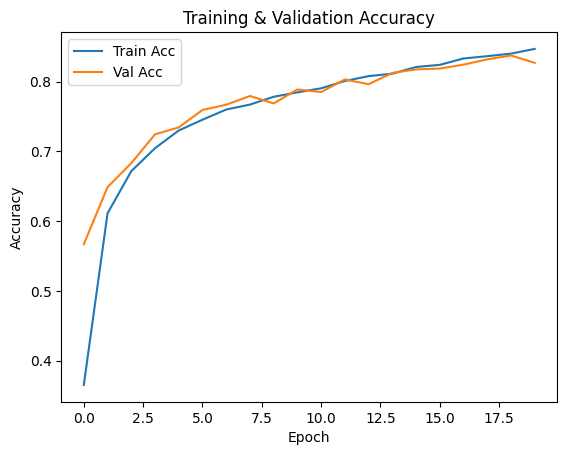

In [21]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()